In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import DataFrame, Series
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

from warnings import filterwarnings
filterwarnings("ignore")

In [50]:
from scipy import stats

In [119]:
df = pd.read_excel('Telecom Churn Rate Dataset.xlsx')
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,No
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,No
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,No


In [4]:
df.shape

(1142, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

In [24]:
numerical_vars = df.select_dtypes(np.number)
numerical_vars.head()

,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn
0,1,396.5,4758,0,0,1
1,71,963.5,11562,0,0,0
2,2,955.0,11460,0,0,0
3,1,452.5,5430,0,0,0
4,43,902.5,10830,0,0,0


In [72]:
categorical_vars = df.select_dtypes("object")
categorical_vars.head()

,Gender,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method
0,Male,Yes,No,No,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
1,Female,Yes,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic)
2,Male,Yes,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
3,Male,Yes,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic)
4,Female,Yes,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check


In [120]:
label_encoder = LabelEncoder()
churn = df['Churn']
churn_encoded = label_encoder.fit_transform(churn)
churn_encoded

churn_df = pd.DataFrame(churn_encoded, columns=['churn'])
churn_df.head(10)

,churn
0,1
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [121]:
df = pd.concat([df, churn_df], axis=1)
df.drop('Churn',axis=1, inplace=True)
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,1
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,0
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,0
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,0
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

In [73]:
categorical_vars.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paper_less_Billing', 'Payment_Method'],
      dtype='object')

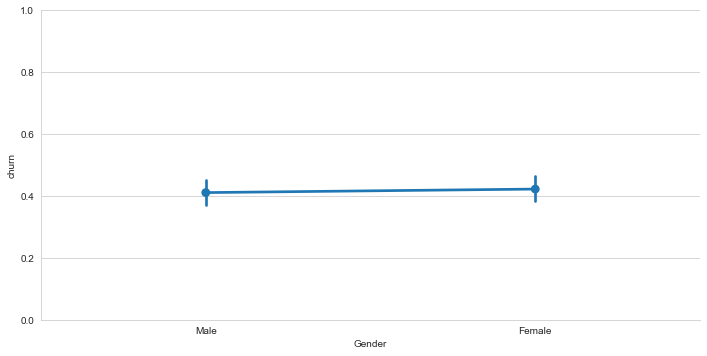

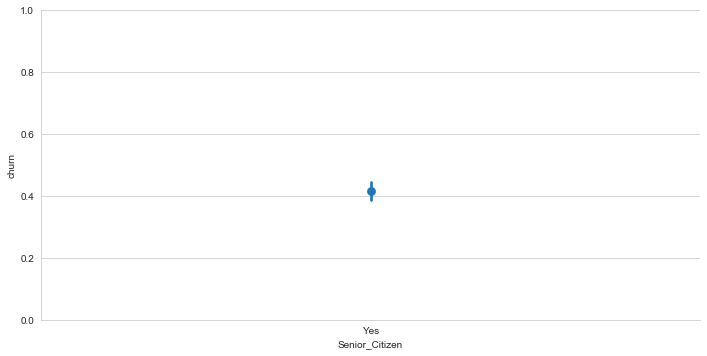

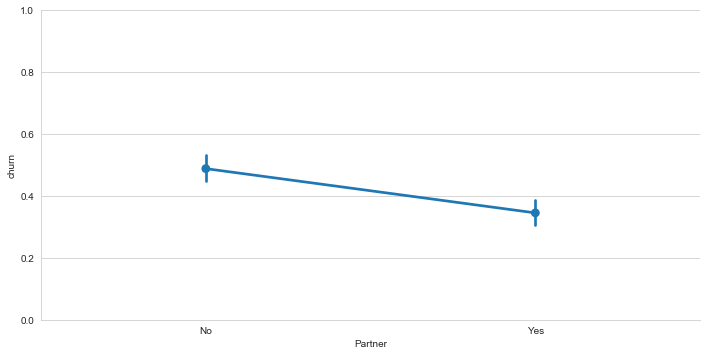

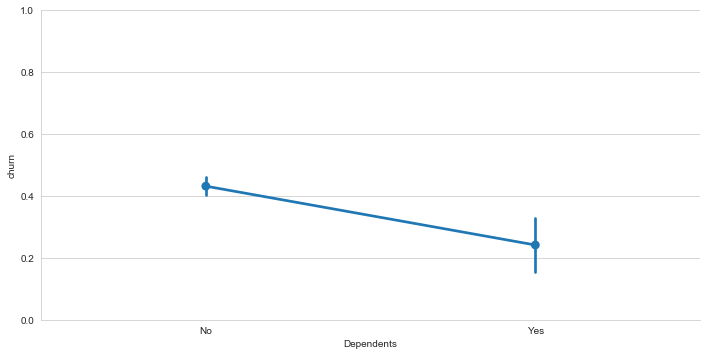

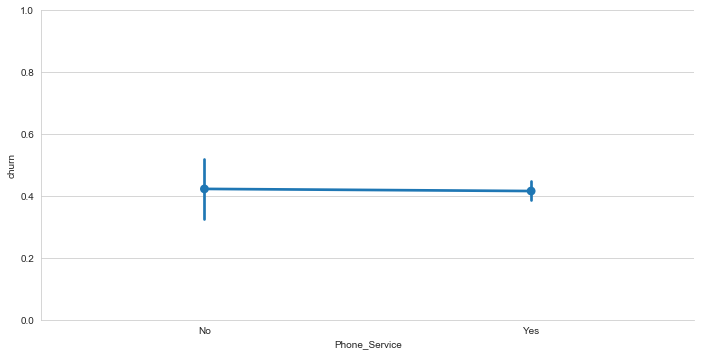

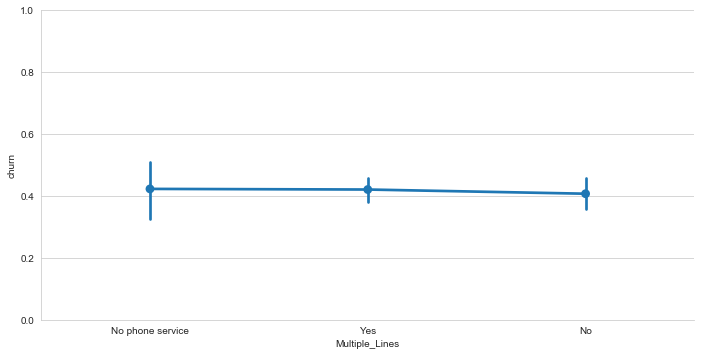

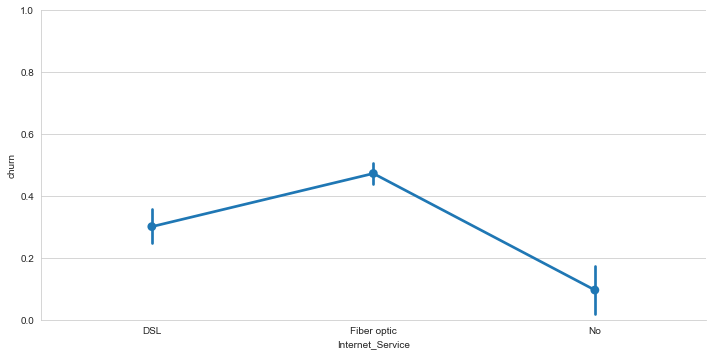

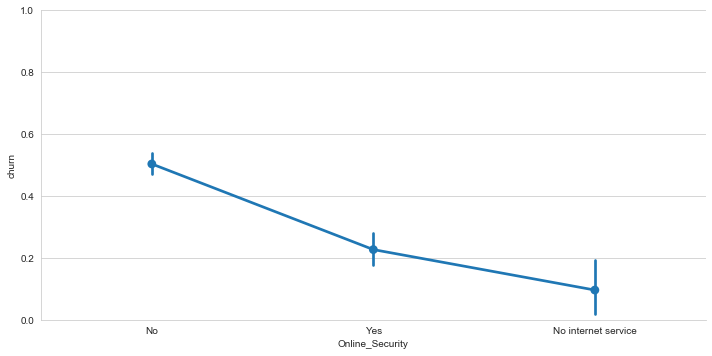

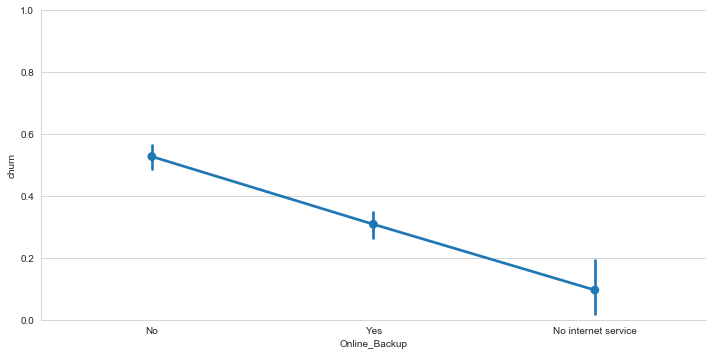

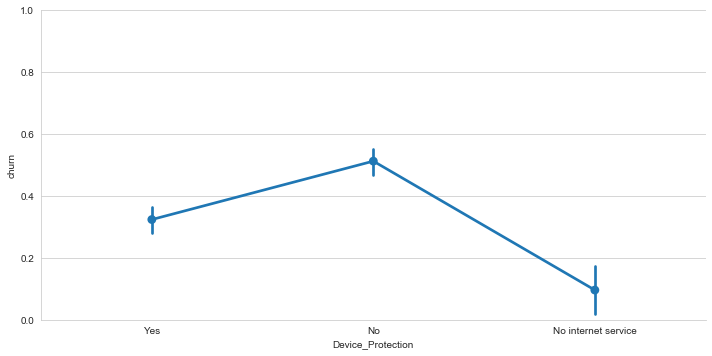

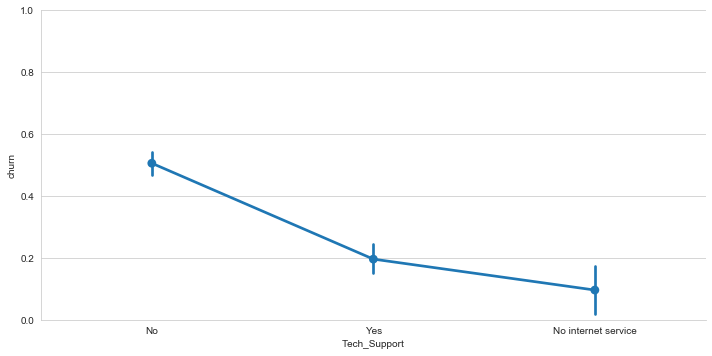

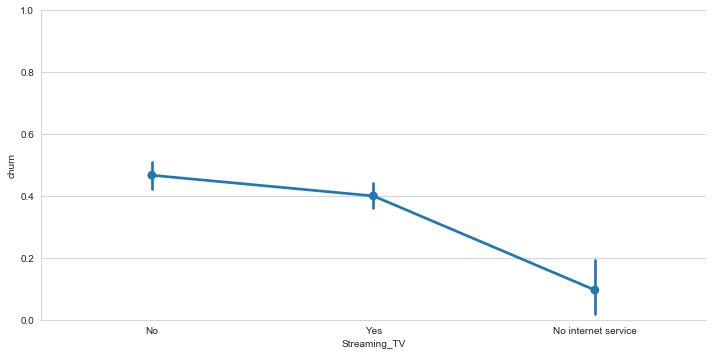

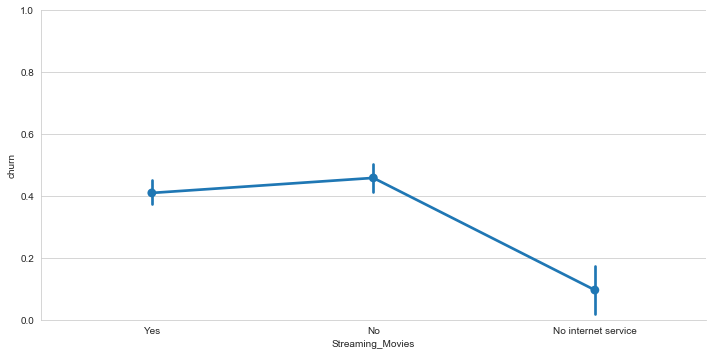

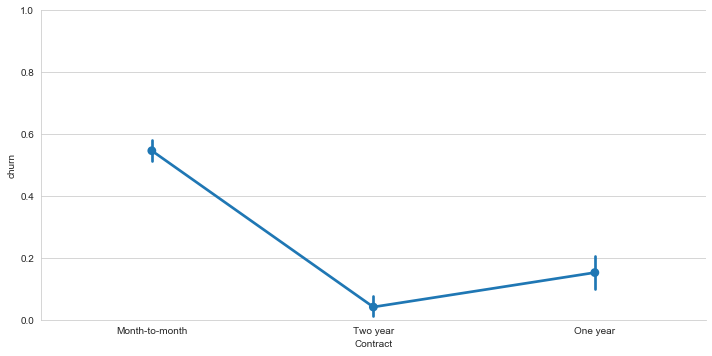

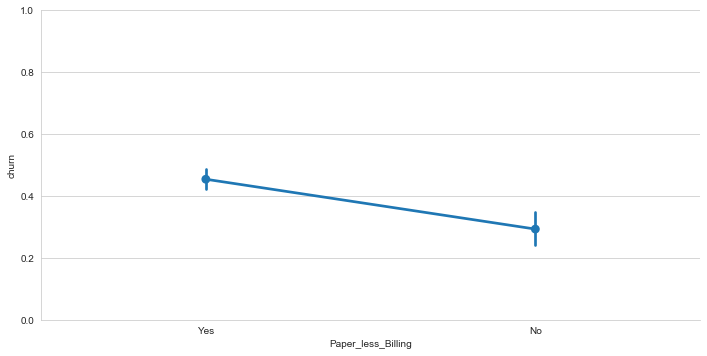

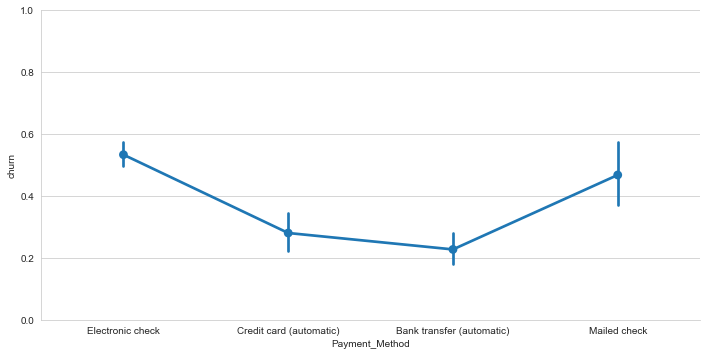

In [26]:
# Generate categorical plots for features
for col in ['Gender', 'Senior_Citizen', 'Partner', 'Dependents','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paper_less_Billing','Payment_Method']:
    sns.catplot(x=col, y='churn', data=df, kind='point', aspect=2, )
    plt.ylim(0, 1)

In [37]:
# Split embarked by whether the passenger had a cabin
df.pivot_table('churn', index='Gender', columns=['Streaming_TV'], aggfunc='count')
df.pivot_table('churn', index='Gender', columns=['Partner'], aggfunc='count')

Partner,No,Yes
Gender,,
Female,320,248
Male,249,325


In [38]:
df.pivot_table('churn', index='Gender', columns=['Streaming_TV'], aggfunc='count')

Streaming_TV,No,No internet service,Yes
Gender,,,
Female,255,21,292
Male,263,31,280


In [39]:
df.pivot_table('churn', index='Gender', columns=['Dependents'], aggfunc='count')

Dependents,No,Yes
Gender,,
Female,526,42
Male,525,49


In [40]:
df.pivot_table('churn', index='Gender', columns=['Contract'], aggfunc='count')

Contract,Month-to-month,One year,Two year
Gender,,,
Female,399,101,68
Male,408,89,77


In [42]:
df.pivot_table('churn', index='Gender', columns=['Payment_Method'], aggfunc='count')

Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Gender,,,,
Female,112,110,296,50
Male,121,111,298,44


In [43]:
df.pivot_table('churn', index='Gender', columns=['Streaming_Movies'], aggfunc='count')

Streaming_Movies,No,No internet service,Yes
Gender,,,
Female,255,21,292
Male,240,31,303


In [44]:
numerical_vars.corr()

,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn
Tenure,1.000000,0.267175,0.267175,0.026220,0.254684,-0.428767
Monthly_Charges,0.267175,1.000000,1.000000,0.012450,0.257708,0.031786
Yearly_Charge,0.267175,1.000000,1.000000,0.012450,0.257708,0.031786
Admin_Tickets,0.026220,0.012450,0.012450,1.000000,-0.028886,-0.070216
Tech_Tickets,0.254684,0.257708,0.257708,-0.028886,1.000000,0.380561
churn,-0.428767,0.031786,0.031786,-0.070216,0.380561,1.000000


In [45]:
numerical_vars.describe()

,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,33.295972,798.203590,9578.443082,0.513135,0.684764,0.416813
std,24.188530,237.640267,2851.683204,1.296967,1.550357,0.493247
min,1.000000,189.500000,2274.000000,0.000000,0.000000,0.000000
25%,10.000000,701.500000,8418.000000,0.000000,0.000000,0.000000
50%,31.000000,848.500000,10182.000000,0.000000,0.000000,0.000000
75%,56.000000,980.750000,11769.000000,0.000000,0.000000,1.000000
max,72.000000,1174.500000,14094.000000,5.000000,9.000000,1.000000


In [51]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(df.groupby('churn')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    churn = df[df['churn']==1][feature]
    not_churned = df[df['churn']==0][feature]
    tstat, pval = stats.ttest_ind(churn, not_churned, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [52]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['Tenure', 'Monthly_Charges', 'Yearly_Charge', 'Admin_Tickets', 'Tech_Tickets']:
    describe_cont_feature(feature)


*** Results for Tenure ***
       count       mean        std  min   25%   50%   75%   max
churn                                                          
0      666.0  42.060060  23.228049  1.0  22.0  45.0  64.0  72.0
1      476.0  21.033613  19.791410  1.0   3.0  15.0  35.0  72.0
t-statistic: -16.5, p-value: 1.4e-54
None

*** Results for Monthly_Charges ***
       count        mean         std    min      25%     50%      75%     max
churn                                                                        
0      666.0  791.820571  255.487851  189.5  652.125  848.50  991.750  1173.5
1      476.0  807.134454  210.078864  194.5  736.250  848.25  957.125  1174.5
t-statistic: 1.1, p-value: 0.268
None

*** Results for Yearly_Charge ***
       count         mean          std     min     25%      50%      75%  \
churn                                                                      
0      666.0  9501.846847  3065.854207  2274.0  7825.5  10182.0  11901.0   
1      476.0  9685.61344

In [74]:
categorical_vars.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Internet_Service', 'Online_Security',
       'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV',
       'Streaming_Movies', 'Contract', 'Paper_less_Billing', 'Payment_Method'],
      dtype='object')

In [86]:
df['Multiple_Lines'].unique()

array(['No phone service', 'Yes', 'No'], dtype=object)

In [122]:
#Streaming_TV
def classify(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Multiple Lines
def classify2(text):
    if text == 'No phone service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Online security
def classify3(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Online backup
def classify4(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Device Protection
def classify5(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Tech support
def classify6(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#StreamingMovies
def classify7(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Contract
def classify8(text):
    if text == 'Month-to-month':
        return 0
    elif text == 'One year':
        return 1
    elif text == 'Two year':
        return 2

df['Streaming_TV'] = df['Streaming_TV'].apply(classify)
df['Multiple_Lines'] = df['Multiple_Lines'].apply(classify2)
df['Online_Security'] = df['Online_Security'].apply(classify3)
df['Online_Backup'] = df['Online_Backup'].apply(classify4)
df['Device_Protection'] = df['Device_Protection'].apply(classify5)
df['Tech_Support'] = df['Tech_Support'].apply(classify6)
df['Streaming_Movies'] = df['Streaming_Movies'].apply(classify7)
df['Contract'] = df['Contract'].apply(classify8)

In [101]:
#Streaming_TV
def classify(text):
    if text == 'No internet service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#Multiple Lines
def classify2(text):
    if text == 'No phone service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#Online security
def classify3(text):
    if text == 'No internet service':
        return 'No'
    elif text == 'No':
        return 'No'
    elif text == 'Yes':
        return 'Yes'
#Online backup
def classify4(text):
    if text == 'No internet service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#Device Protection
def classify5(text):
    if text == 'No internet service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#Tech support
def classify6(text):
    if text == 'No internet service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#StreamingMovies
def classify7(text):
    if text == 'No internet service':
        return 0
    elif text == 'No':
        return 0
    elif text == 'Yes':
        return 1
#Contract
def classify8(text):
    if text == 'Month-to-month':
        return 0
    elif text == 'One year':
        return 1
    elif text == 'Two year':
        return 2

df['Streaming_TV'] = df['Streaming_TV'].apply(classify)
df['Multiple_Lines'] = df['Multiple_Lines'].apply(classify2)
df['Online_Security'] = df['Online_Security'].apply(classify3)
df['Online_Backup'] = df['Online_Backup'].apply(classify4)
df['Device_Protection'] = df['Device_Protection'].apply(classify5)
df['Tech_Support'] = df['Tech_Support'].apply(classify6)
df['Streaming_Movies'] = df['Streaming_Movies'].apply(classify7)
df['Contract'] = df['Contract'].apply(classify8)

In [124]:
#Gender
def classify(text):
    if text == 'Male':
        return 1
    elif text == 'Female':
        return 0
#Senior_Citizen
def classify1(text):
    if text == 'Yes':
        return 1

#Partner
def classify2(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

#Phone_Service
def classify3(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0
#Online_Security
def classify4(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0
#PaperBilling
def classify5(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

df['Gender'] = df['Gender'].apply(classify)
df['Partner'] = df['Partner'].apply(classify2)
df['Phone_Service'] = df['Phone_Service'].apply(classify3)
df['Online_Security'] = df['Online_Security'].apply(classify4)
df['Paperless_Billing'] = df['Paper_less_Billing'].apply(classify5)

In [129]:
df.iloc[:,9:25]

,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,No,Yes,No,No,Yes,0,Yes,Electronic check,396.5,4758,0,0,1,1
1,Yes,Yes,Yes,No,No,2,Yes,Credit card (automatic),963.5,11562,0,0,0,1
2,No,Yes,No,Yes,Yes,0,Yes,Credit card (automatic),955.0,11460,0,0,0,1
3,No,No,No,No,No,0,No,Bank transfer (automatic),452.5,5430,0,0,0,0
4,Yes,No,No,Yes,No,0,Yes,Electronic check,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,Yes,Yes,No,Yes,Yes,0,Yes,Electronic check,1035.0,12420,0,0,0,1
1138,No,No,No,Yes,Yes,0,Yes,Electronic check,444.0,5328,0,0,0,1
1139,Yes,No,No,No,No,1,No,Credit card (automatic),600.0,7200,0,0,0,0
1140,No,No,No,No,No,0,Yes,Electronic check,757.5,9090,0,0,1,1


In [130]:
#SeniorCitizen
def classify(text):
    if text == 'Yes':
        return 1

#Dependents
def classify2(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

#Multipleline
def classify3(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

#OnlineBackup
def classify4(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0
#Device
def classify5(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0
#Techsupport
def classify6(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

#StreamingTV
def classify7(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

df['Senior_Citizen'] = df['Senior_Citizen'].apply(classify)
df['Dependents'] = df['Dependents'].apply(classify2)
df['Multiple_Lines'] = df['Multiple_Lines'].apply(classify3)
df['Online_Backup'] = df['Online_Backup'].apply(classify4)
df['Device_Protection'] = df['Device_Protection'].apply(classify5)
df['Tech_Support'] = df['Tech_Support'].apply(classify6)
df['Streaming_TV'] = df['Streaming_TV'].apply(classify7)

In [117]:
df['Partner'].unique()

array([0, 1], dtype=int64)

In [132]:
df.iloc[:,11:25]

,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,0,0,Yes,0,Yes,Electronic check,396.5,4758,0,0,1,1
1,1,0,No,2,Yes,Credit card (automatic),963.5,11562,0,0,0,1
2,0,1,Yes,0,Yes,Credit card (automatic),955.0,11460,0,0,0,1
3,0,0,No,0,No,Bank transfer (automatic),452.5,5430,0,0,0,0
4,0,1,No,0,Yes,Electronic check,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0,1,Yes,0,Yes,Electronic check,1035.0,12420,0,0,0,1
1138,0,1,Yes,0,Yes,Electronic check,444.0,5328,0,0,0,1
1139,0,0,No,1,No,Credit card (automatic),600.0,7200,0,0,0,0
1140,0,0,No,0,Yes,Electronic check,757.5,9090,0,0,1,1


In [133]:
#Streaming_Movies
def classify(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

#Paper_less_Billing
def classify2(text):
    if text == 'Yes':
        return 1
    elif text == 'No':
        return 0

df['Streaming_Movies'] = df['Streaming_Movies'].apply(classify)
df['Paper_less_Billing'] = df['Paper_less_Billing'].apply(classify2)

In [134]:
df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,1,1,0,0,1,0,0,DSL,0,0,...,1,0,1,Electronic check,396.5,4758,0,0,1,1
1,0,1,1,0,71,1,1,Fiber optic,1,1,...,0,2,1,Credit card (automatic),963.5,11562,0,0,0,1
2,1,1,1,0,2,1,0,Fiber optic,0,0,...,1,0,1,Credit card (automatic),955.0,11460,0,0,0,1
3,1,1,0,0,1,1,0,DSL,0,0,...,0,0,0,Bank transfer (automatic),452.5,5430,0,0,0,0
4,0,1,0,0,43,1,1,Fiber optic,0,1,...,0,0,1,Electronic check,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0,1,1,0,63,1,1,Fiber optic,0,1,...,1,0,1,Electronic check,1035.0,12420,0,0,0,1
1138,0,1,0,0,6,0,0,DSL,0,0,...,1,0,1,Electronic check,444.0,5328,0,0,0,1
1139,1,1,1,0,55,1,1,DSL,1,1,...,0,1,0,Credit card (automatic),600.0,7200,0,0,0,0
1140,1,1,0,0,1,1,1,Fiber optic,0,0,...,0,0,1,Electronic check,757.5,9090,0,0,1,1


In [138]:
df['Payment_Method'].unique()

array(['Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)', 'Mailed check'], dtype=object)

In [139]:
def classify(text):
    if text == 'DSL':
        return 1
    elif text == 'Fiber optic':
        return 2
    else:
        return 0

def classify1(text):
    if text == 'Electronic check':
        return 1
    elif text == 'Credit card (automatic)':
        return 2
    elif text == 'Bank transfer (automatic)':
        return 3
    elif text == 'Mailed check':
        return 4
    
df['Internet_Service'] = df['Internet_Service'].apply(classify)
df['Payment_Method'] = df['Payment_Method'].apply(classify1)

In [140]:
df

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,1,1,0,0,1,0,0,1,0,0,...,1,0,1,1,396.5,4758,0,0,1,1
1,0,1,1,0,71,1,1,2,1,1,...,0,2,1,2,963.5,11562,0,0,0,1
2,1,1,1,0,2,1,0,2,0,0,...,1,0,1,2,955.0,11460,0,0,0,1
3,1,1,0,0,1,1,0,1,0,0,...,0,0,0,3,452.5,5430,0,0,0,0
4,0,1,0,0,43,1,1,2,0,1,...,0,0,1,1,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,0,1,1,0,63,1,1,2,0,1,...,1,0,1,1,1035.0,12420,0,0,0,1
1138,0,1,0,0,6,0,0,1,0,0,...,1,0,1,1,444.0,5328,0,0,0,1
1139,1,1,1,0,55,1,1,1,1,1,...,0,1,0,2,600.0,7200,0,0,0,0
1140,1,1,0,0,1,1,1,2,0,0,...,0,0,1,1,757.5,9090,0,0,1,1


In [141]:
IS = df['Internet_Service']
IS

0       1
1       2
2       2
3       1
4       2
       ..
1137    2
1138    1
1139    1
1140    2
1141    2
Name: Internet_Service, Length: 1142, dtype: int64

In [168]:
binary_encoder = OneHotEncoder(categories='auto')
IS2 = np.array(IS).reshape(-1,1)
Internet_1hot = binary_encoder.fit_transform(IS2)
Internet_1hot_mat = Internet_1hot.toarray()
Internet_df = pd.DataFrame(Internet_1hot_mat, columns=['IS_None','IS_DSL','IS_Fiber optic'])
Internet_df.head()

,IS_None,IS_DSL,IS_Fiber optic
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [169]:
#df.drop('Internet_Service',axis=1,inplace=True)
df = pd.concat([Internet_df, df], axis=1)

In [173]:
df.iloc[:,11:25]

,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,0,1,0,0,1,0,1,1,396.5,4758,0,0,1,1
1,1,1,1,0,0,2,1,2,963.5,11562,0,0,0,1
2,0,1,0,1,1,0,1,2,955.0,11460,0,0,0,1
3,0,0,0,0,0,0,0,3,452.5,5430,0,0,0,0
4,1,0,0,1,0,0,1,1,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1,1,0,1,1,0,1,1,1035.0,12420,0,0,0,1
1138,0,0,0,1,1,0,1,1,444.0,5328,0,0,0,1
1139,1,0,0,0,0,1,0,2,600.0,7200,0,0,0,0
1140,0,0,0,0,0,0,1,1,757.5,9090,0,0,1,1


In [174]:
contract = df['Contract']

In [180]:
contract = np.array(contract).reshape(-1,1)
contract_1hot = binary_encoder.fit_transform(contract)
contract_1hot_mat = contract_1hot.toarray()
contract_df = pd.DataFrame(contract_1hot_mat, columns=['Co_m2m','Co_1','Co_2'])
contract_df.head()

,Co_m2m,Co_1,Co_2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [183]:
payment = df['Payment_Method']
payment = np.array(payment).reshape(-1,1)
payment_1hot = binary_encoder.fit_transform(payment)
payment_1hot_mat = payment_1hot.toarray()
payment_df = pd.DataFrame(payment_1hot_mat, columns=['PM_Electronic','PM_Credit','PM_Bank','PM_Mail'])
payment_df.head()

,PM_Electronic,PM_Credit,PM_Bank,PM_Mail
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [184]:
df.drop(['Contract','Payment_Method'], axis=1, inplace=True)

In [187]:
df = pd.concat([payment_df, contract_df, df], axis=1)
df

,PM_Electronic,PM_Credit,PM_Bank,PM_Mail,Co_m2m,Co_1,Co_2,IS_None,IS_DSL,IS_Fiber optic,...,Tech_Support,Streaming_TV,Streaming_Movies,Paper_less_Billing,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,churn,Paperless_Billing
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,1,1,396.5,4758,0,0,1,1
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,963.5,11562,0,0,0,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,1,955.0,11460,0,0,0,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,452.5,5430,0,0,0,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,1,902.5,10830,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,1,1035.0,12420,0,0,0,1
1138,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,1,444.0,5328,0,0,0,1
1139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,600.0,7200,0,0,0,0
1140,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,757.5,9090,0,0,1,1


In [189]:
df.corr()['churn']

PM_Electronic         0.246766
PM_Credit            -0.135391
PM_Bank              -0.194435
PM_Mail               0.031145
Co_m2m                0.408161
Co_1                 -0.239379
Co_2                 -0.290399
IS_None              -0.142055
IS_DSL               -0.127045
IS_Fiber optic        0.186037
Gender               -0.011546
Senior_Citizen             NaN
Partner              -0.145047
Dependents           -0.104476
Tenure               -0.428767
Phone_Service        -0.004022
Multiple_Lines        0.010154
Online_Security      -0.220516
Online_Backup        -0.185170
Device_Protection    -0.156240
Tech_Support         -0.242996
Streaming_TV         -0.033450
Streaming_Movies     -0.014234
Paper_less_Billing    0.138121
Monthly_Charges       0.031786
Yearly_Charge         0.031786
Admin_Tickets        -0.070216
Tech_Tickets          0.380561
churn                 1.000000
Paperless_Billing     0.138121
Name: churn, dtype: float64

In [190]:
#DROPPING THOSE THAT ARE LESS CORRELATED
df.drop(['PM_Mail','Gender','Senior_Citizen','Dependents','Phone_Service','Multiple_Lines','Streaming_TV','Streaming_Movies','Monthly_Charges','Yearly_Charge','Admin_Tickets'], axis=1, inplace=True)
df.head()


,PM_Electronic,PM_Credit,PM_Bank,Co_m2m,Co_1,Co_2,IS_None,IS_DSL,IS_Fiber optic,Partner,Tenure,Online_Security,Online_Backup,Device_Protection,Tech_Support,Paper_less_Billing,Tech_Tickets,churn,Paperless_Billing
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1,0,1,0,1,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,71,1,1,1,1,1,0,0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,2,0,0,1,0,1,0,0,1
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,43,0,1,0,0,1,0,0,1


In [195]:
df.corr()['churn'].sort_values(ascending=False)

churn                1.000000
Co_m2m               0.408161
Tech_Tickets         0.380561
PM_Electronic        0.246766
IS_Fiber optic       0.186037
Device_Protection   -0.156240
Online_Backup       -0.185170
PM_Bank             -0.194435
Online_Security     -0.220516
Co_1                -0.239379
Tech_Support        -0.242996
Co_2                -0.290399
Tenure              -0.428767
Name: churn, dtype: float64

In [194]:
df.drop(['Paperless_Billing','IS_DSL','PM_Credit','IS_None','Partner'], axis=1, inplace=True)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('churn', axis=1),
                                                    df['churn'], test_size=0.3,
                                                    random_state = 100)

In [197]:
print(X_train.shape)
print(y_train.shape)

(799, 12)
(799,)


In [198]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [199]:
y_pred = LogReg.predict(X_test)

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       198
           1       0.73      0.86      0.79       145

    accuracy                           0.81       343
   macro avg       0.81      0.81      0.81       343
weighted avg       0.82      0.81      0.81       343



In [201]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[376,  92],
       [ 46, 285]], dtype=int64)

In [202]:
precision_score(y_train, y_train_pred)

0.7559681697612732

In [208]:
df[0:1]

,PM_Electronic,PM_Bank,Co_m2m,Co_1,Co_2,IS_Fiber optic,Tenure,Online_Security,Online_Backup,Device_Protection,Tech_Support,Tech_Tickets,churn
0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0,0,1


In [204]:
test_churn = np.array([1,0,1,0,0,1,50,0,0,1,1,0]).reshape(1,-1)

print(LogReg.predict(test_churn))
print(LogReg.predict_proba(test_churn))

[0]
[[0.94488087 0.05511913]]


In [210]:
test_churn = np.array([1,0,1,0,0,0,1,0,0,1,0,0]).reshape(1,-1)
if LogReg.predict(test_churn) == 0:
    print('The client has low probability of leaving!')
else:
    print('The client has high probability of leaving!')

The client has high probability of leaving!
